## Depression Analysis

In [444]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_curve, auc, precision_recall_fscore_support
)
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree

In [445]:
df = pd.read_csv("C:/Users/Himanshi Agarwal/OneDrive/Desktop/sem6/ML/depression.csv")
df.head(5)

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Depression Indicator
0,Crystal Brooks,64.0,Married,PhD,NaN,Non-smoker,Sedentary,Employed,112160.42,Low,Unhealthy,Fair,No,No,No,No,Yes
1,Roger Webster,77.0,Married,Bachelor's Degree,NaN,Non-smoker,Sedentary,Employed,62647.39,High,Unhealthy,Fair,No,No,No,Yes,Yes
2,Brian Smith,52.0,Married,High School,1.0,Non-smoker,Moderate,Employed,26084.99,Moderate,Unhealthy,Poor,No,Yes,Yes,No,No
3,Michelle Morrow,29.0,Single,Associate Degree,0.0,Non-smoker,Sedentary,Unemployed,1153.86,Low,Unhealthy,Poor,No,Yes,No,No,Yes
4,Erin Russell,NaN,Widowed,Master's Degree,3.0,Non-smoker,Sedentary,Unemployed,16474.33,High,Moderate,Poor,No,No,No,Yes,Yes


In [446]:
df.describe()

,Age,Number of Children,Income
count,523.000000,580.000000,593.000000
mean,48.910134,1.256897,51553.024047
std,17.678091,1.207863,40311.921648
min,18.000000,0.000000,12.200000
25%,35.000000,0.000000,22692.570000
50%,49.000000,1.000000,40257.610000
75%,65.000000,2.000000,76121.230000
max,80.000000,4.000000,205580.460000


## Removing Irrelevant Columns

### Dropped 'Name' column from the dataset as it is unnecessary for analysis.

In [448]:
df = df.drop(["Name"], axis=1)
df.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Depression Indicator
0,64.0,Married,PhD,NaN,Non-smoker,Sedentary,Employed,112160.42,Low,Unhealthy,Fair,No,No,No,No,Yes
1,77.0,Married,Bachelor's Degree,NaN,Non-smoker,Sedentary,Employed,62647.39,High,Unhealthy,Fair,No,No,No,Yes,Yes
2,52.0,Married,High School,1.0,Non-smoker,Moderate,Employed,26084.99,Moderate,Unhealthy,Poor,No,Yes,Yes,No,No
3,29.0,Single,Associate Degree,0.0,Non-smoker,Sedentary,Unemployed,1153.86,Low,Unhealthy,Poor,No,Yes,No,No,Yes
4,NaN,Widowed,Master's Degree,3.0,Non-smoker,Sedentary,Unemployed,16474.33,High,Moderate,Poor,No,No,No,Yes,Yes


## Checking for any duplicate rows in dataset and removing them if there are any

In [450]:
print("Rows and Column in Dataset are : " , df.shape)

Rows and Column in Dataset are :  (599, 16)


In [451]:
duplicate = df[df.duplicated()]
print("Number of Duplicate rows : ", duplicate.shape)

Number of Duplicate rows :  (0, 16)


## Checking for Null values in Dataset and Removing it

In [453]:
print(df.isnull().sum())

Age                             76
Marital Status                   0
Education Level                  0
Number of Children              19
Smoking Status                   0
Physical Activity Level          0
Employment Status                0
Income                           6
Alcohol Consumption              0
Dietary Habits                   0
Sleep Patterns                   0
History of Mental Illness        0
History of Substance Abuse       0
Family History of Depression     0
Chronic Medical Conditions       0
Depression Indicator             0
dtype: int64


In [454]:
df = df.dropna()
df.count()

Age                             501
Marital Status                  501
Education Level                 501
Number of Children              501
Smoking Status                  501
Physical Activity Level         501
Employment Status               501
Income                          501
Alcohol Consumption             501
Dietary Habits                  501
Sleep Patterns                  501
History of Mental Illness       501
History of Substance Abuse      501
Family History of Depression    501
Chronic Medical Conditions      501
Depression Indicator            501
dtype: int64

In [455]:
print(df.isnull().sum())

Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
Depression Indicator            0
dtype: int64


## Detecting Outliers in Dataset

<Axes: xlabel='Income'>

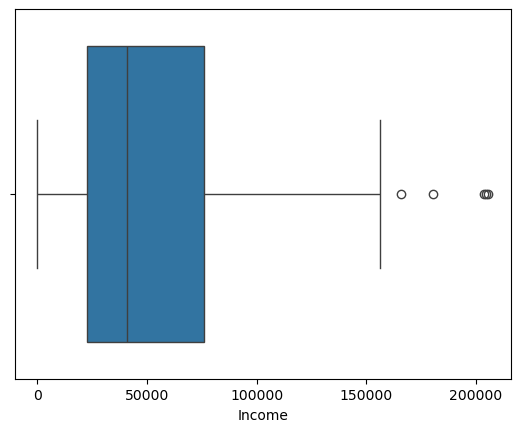

In [457]:
sns.boxplot(x=df['Income'])

### Interpretation: There are many outliers in 'Income' column.

In [459]:
df.shape # Number of rows before removing outliers

(501, 16)

In [460]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [461]:
for col in df.columns:
    if(col=="Age" or col=="Number of Children" or col=="Income"):
        df = remove_outliers(df, col)
        

### All outliers from all the columns has been removed.

In [463]:
df.shape  # Number of rows after removing outliers

(496, 16)

## Plotting the Dataset

### Histogram

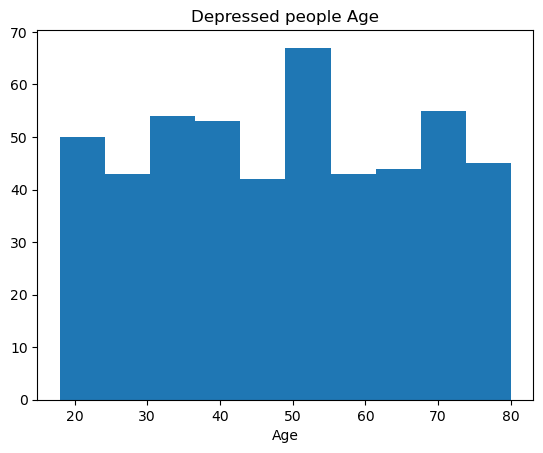

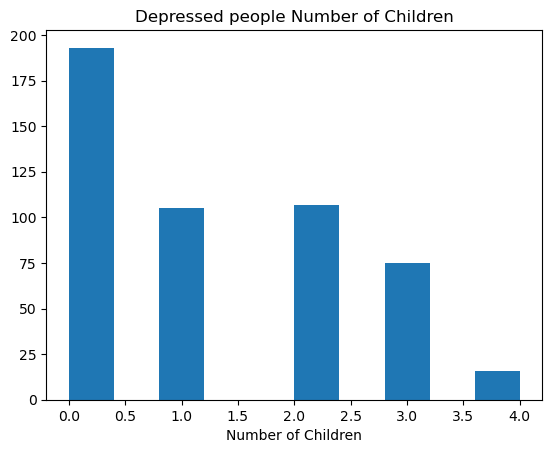

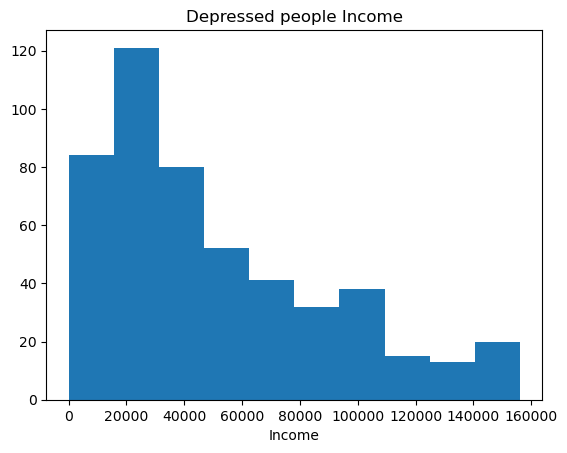

In [466]:
for i in df.columns:
    if df[i].dtype =='float64' or df[i].dtype =='int64':
        col = df[i]
        plt.xlabel(str(i))
        plt.title('Depressed people '+str(i))
        plt.hist(col)
        plt.show()

### Interpretation: The dataset shows that individuals aged 50 to 55 experience the highest prevalence of depression. This age group may require focused attention for mental health interventions.

### Heatmap

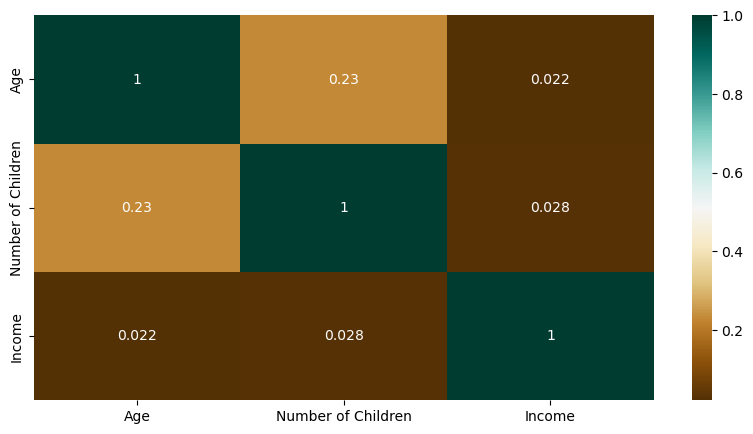

In [469]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 5))
c = numeric_df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
plt.show()

### Interpretation: 

#### Age has a moderate positive correlation (0.23) with the number of children, suggesting that older individuals in the dataset are more likely to have children.

#### Income has very weak correlations with both Age (0.059) and Number of Children (0.02), indicating minimal or no relationship between these variables.

#### All diagonal values are 1, as a variable is perfectly correlated with itself.


## Performing Label Encoding and Dummy Encoding

In [472]:
def label_encode(data, column):
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    print(f"Label encoding applied to '{column}'. Unique values mapped: {dict(enumerate(le.classes_))}")
    return data


df_encoded = label_encode(df, 'Smoking Status')
df_encoded.head()

Label encoding applied to 'Smoking Status'. Unique values mapped: {0: 'Current', 1: 'Former', 2: 'Non-smoker'}


,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Depression Indicator
2,52.0,Married,High School,1.0,2,Moderate,Employed,26084.99,Moderate,Unhealthy,Poor,No,Yes,Yes,No,No
3,29.0,Single,Associate Degree,0.0,2,Sedentary,Unemployed,1153.86,Low,Unhealthy,Poor,No,Yes,No,No,Yes
5,55.0,Married,Associate Degree,2.0,2,Moderate,Employed,38951.25,Low,Unhealthy,Poor,No,No,No,No,No
6,41.0,Divorced,High School,1.0,2,Moderate,Employed,31985.33,Low,Unhealthy,Good,No,No,Yes,Yes,Yes
7,52.0,Widowed,Associate Degree,0.0,1,Moderate,Unemployed,24466.72,Low,Unhealthy,Fair,Yes,Yes,No,No,Yes


In [473]:
def dummy_encode(data, column):
    encoded_data = pd.get_dummies(data, columns=[column], drop_first=True)
    print(f"Dummy encoding applied to '{column}'. New columns created:\n{list(encoded_data.columns)}")
    return encoded_data

df_encoded = dummy_encode(df, 'Physical Activity Level')
df_encoded.head()

Dummy encoding applied to 'Physical Activity Level'. New columns created:
['Age', 'Marital Status', 'Education Level', 'Number of Children', 'Smoking Status', 'Employment Status', 'Income', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns', 'History of Mental Illness', 'History of Substance Abuse', 'Family History of Depression', 'Chronic Medical Conditions', 'Depression Indicator', 'Physical Activity Level_Moderate', 'Physical Activity Level_Sedentary']


,Age,Marital Status,Education Level,Number of Children,Smoking Status,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Depression Indicator,Physical Activity Level_Moderate,Physical Activity Level_Sedentary
2,52.0,Married,High School,1.0,2,Employed,26084.99,Moderate,Unhealthy,Poor,No,Yes,Yes,No,No,True,False
3,29.0,Single,Associate Degree,0.0,2,Unemployed,1153.86,Low,Unhealthy,Poor,No,Yes,No,No,Yes,False,True
5,55.0,Married,Associate Degree,2.0,2,Employed,38951.25,Low,Unhealthy,Poor,No,No,No,No,No,True,False
6,41.0,Divorced,High School,1.0,2,Employed,31985.33,Low,Unhealthy,Good,No,No,Yes,Yes,Yes,True,False
7,52.0,Widowed,Associate Degree,0.0,1,Unemployed,24466.72,Low,Unhealthy,Fair,Yes,Yes,No,No,Yes,True,False


### Scatter Plot

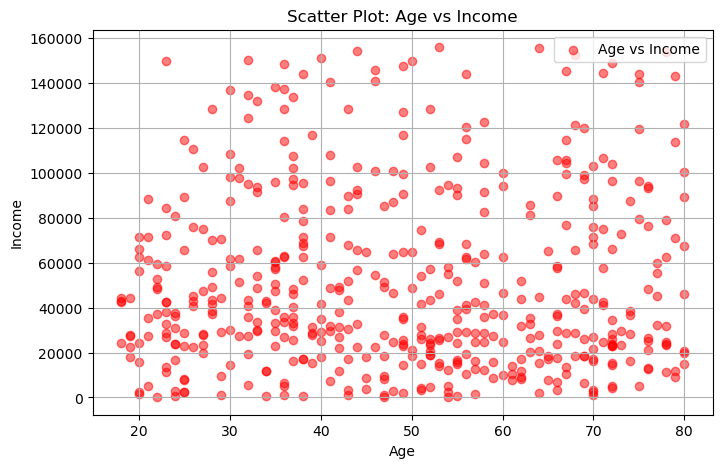

In [477]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Age'], df['Income'], color='red', alpha=0.5, label='Age vs Income')
plt.title('Scatter Plot: Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(True)
plt.legend()
plt.show()

### Interpretation: There is no correlation between Age and Income.

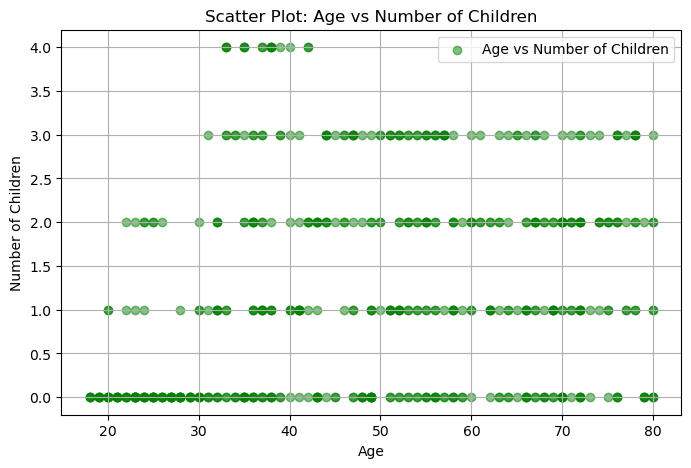

In [479]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Age'], df['Number of Children'], color='green', alpha=0.5, label='Age vs Number of Children')
plt.title('Scatter Plot: Age vs Number of Children')
plt.xlabel('Age')
plt.ylabel('Number of Children')
plt.grid(True)
plt.legend()
plt.show()

### Box Plot

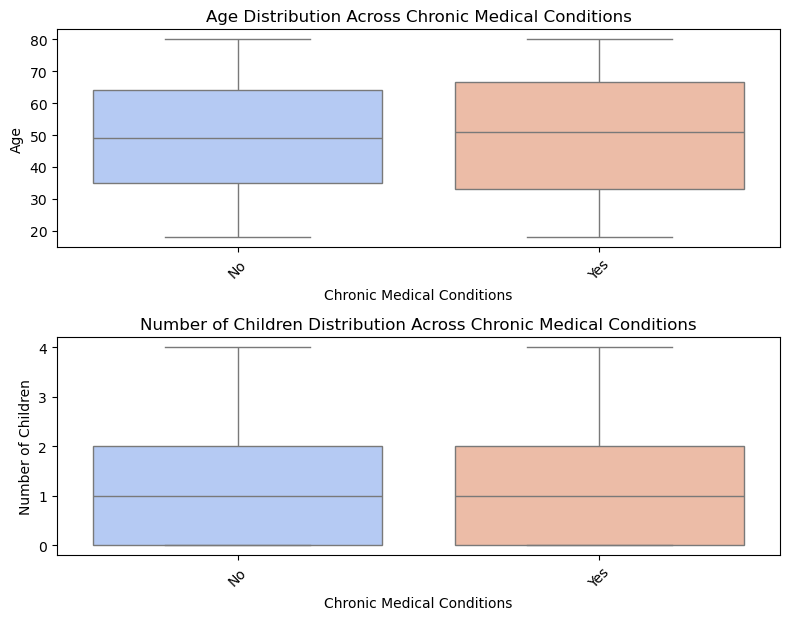

In [481]:
variables = ['Age', 'Number of Children']
             
plt.figure(figsize=(8, 15))
for i, var in enumerate(variables, 1):
    plt.subplot(5, 1, i)
    sns.boxplot(data=df, x='Chronic Medical Conditions', y=var, palette='coolwarm')
    plt.title(f'{var} Distribution Across Chronic Medical Conditions', fontsize=12)
    plt.xlabel('Chronic Medical Conditions')
    plt.ylabel(var)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
plt.show()

### Interpretation: There are no outliers in these box plots as all the outliers has beeen removed already.

### Voilin Plot

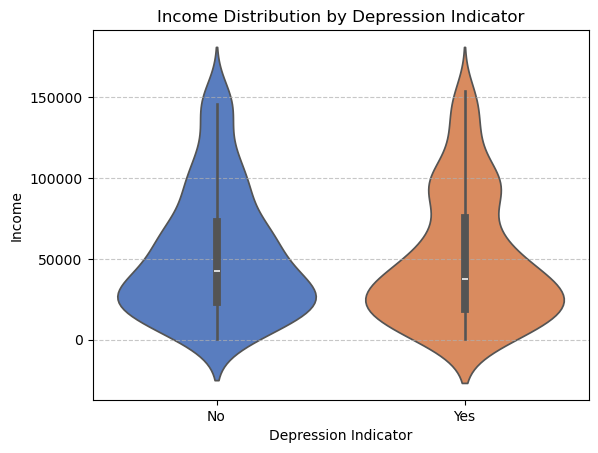

In [484]:
violin_data = df[['Income', 'Depression Indicator']].dropna()

sns.violinplot(x='Depression Indicator', y='Income', data=violin_data, palette='muted')

plt.title('Income Distribution by Depression Indicator')
plt.xlabel('Depression Indicator')
plt.ylabel('Income')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Interpretation : This violin plot shows income distribution differs between people with and without depression. Those without depression have a wider range of income, with a slightly higher median income. Those with depression have a narrower income range, suggesting potential financial challenges.

### Swarm Plot

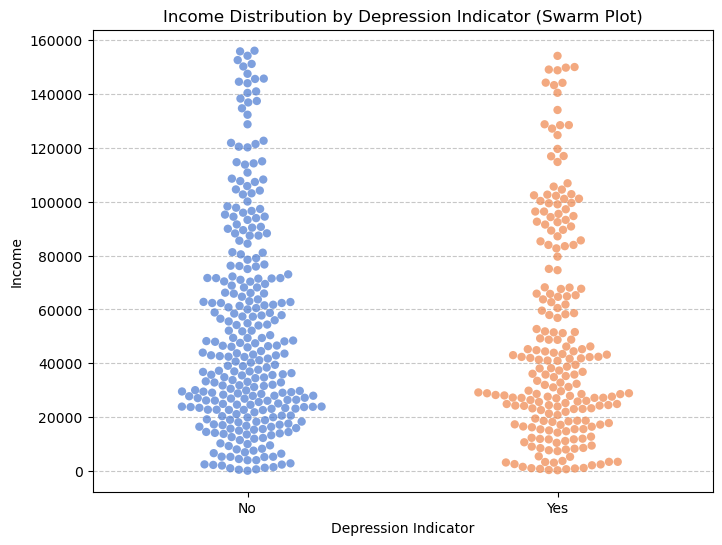

In [487]:
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Depression Indicator', y='Income', data=violin_data, palette='muted', size=6, alpha=0.7)

plt.title('Income Distribution by Depression Indicator (Swarm Plot)')
plt.xlabel('Depression Indicator')
plt.ylabel('Income')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Interpretation : This swarm plot shows a clear income difference between people with and without depression. Those without depression have a wider range of income, often higher, while those with depression have a narrower range, often lower.

In [489]:
# Label Encoding for all non-numeric columns
label_encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is non-numeric
        df[col] = label_encoder.fit_transform(df[col])

# Display the transformed dataframe
print("Updated Numeric DataFrame:")
print(df.head())

# Verify the data types
print("\nData Types after Encoding:")
print(df.dtypes)

Updated Numeric DataFrame:
    Age  Marital Status  Education Level  Number of Children  Smoking Status  \
2  52.0               1                2                 1.0               2   
3  29.0               2                0                 0.0               2   
5  55.0               1                0                 2.0               2   
6  41.0               0                2                 1.0               2   
7  52.0               3                0                 0.0               1   

   Physical Activity Level  Employment Status    Income  Alcohol Consumption  \
2                        1                  0  26084.99                    2   
3                        2                  1   1153.86                    1   
5                        1                  0  38951.25                    1   
6                        1                  0  31985.33                    1   
7                        1                  1  24466.72                    1   

   Dietary 

## Spliting the Dataset into Train and Test Set

In [491]:
X = df.drop(columns=['Depression Indicator'])
y = df['Depression Indicator']
print(X.shape)
print(y.shape)

(496, 15)
(496,)


In [492]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)
print(x_train.shape)
print(x_test.shape)

(372, 15)
(124, 15)


## Fitting a normal decision tree without any fine tuning and check the results

In [494]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

## Visualizing decision tree

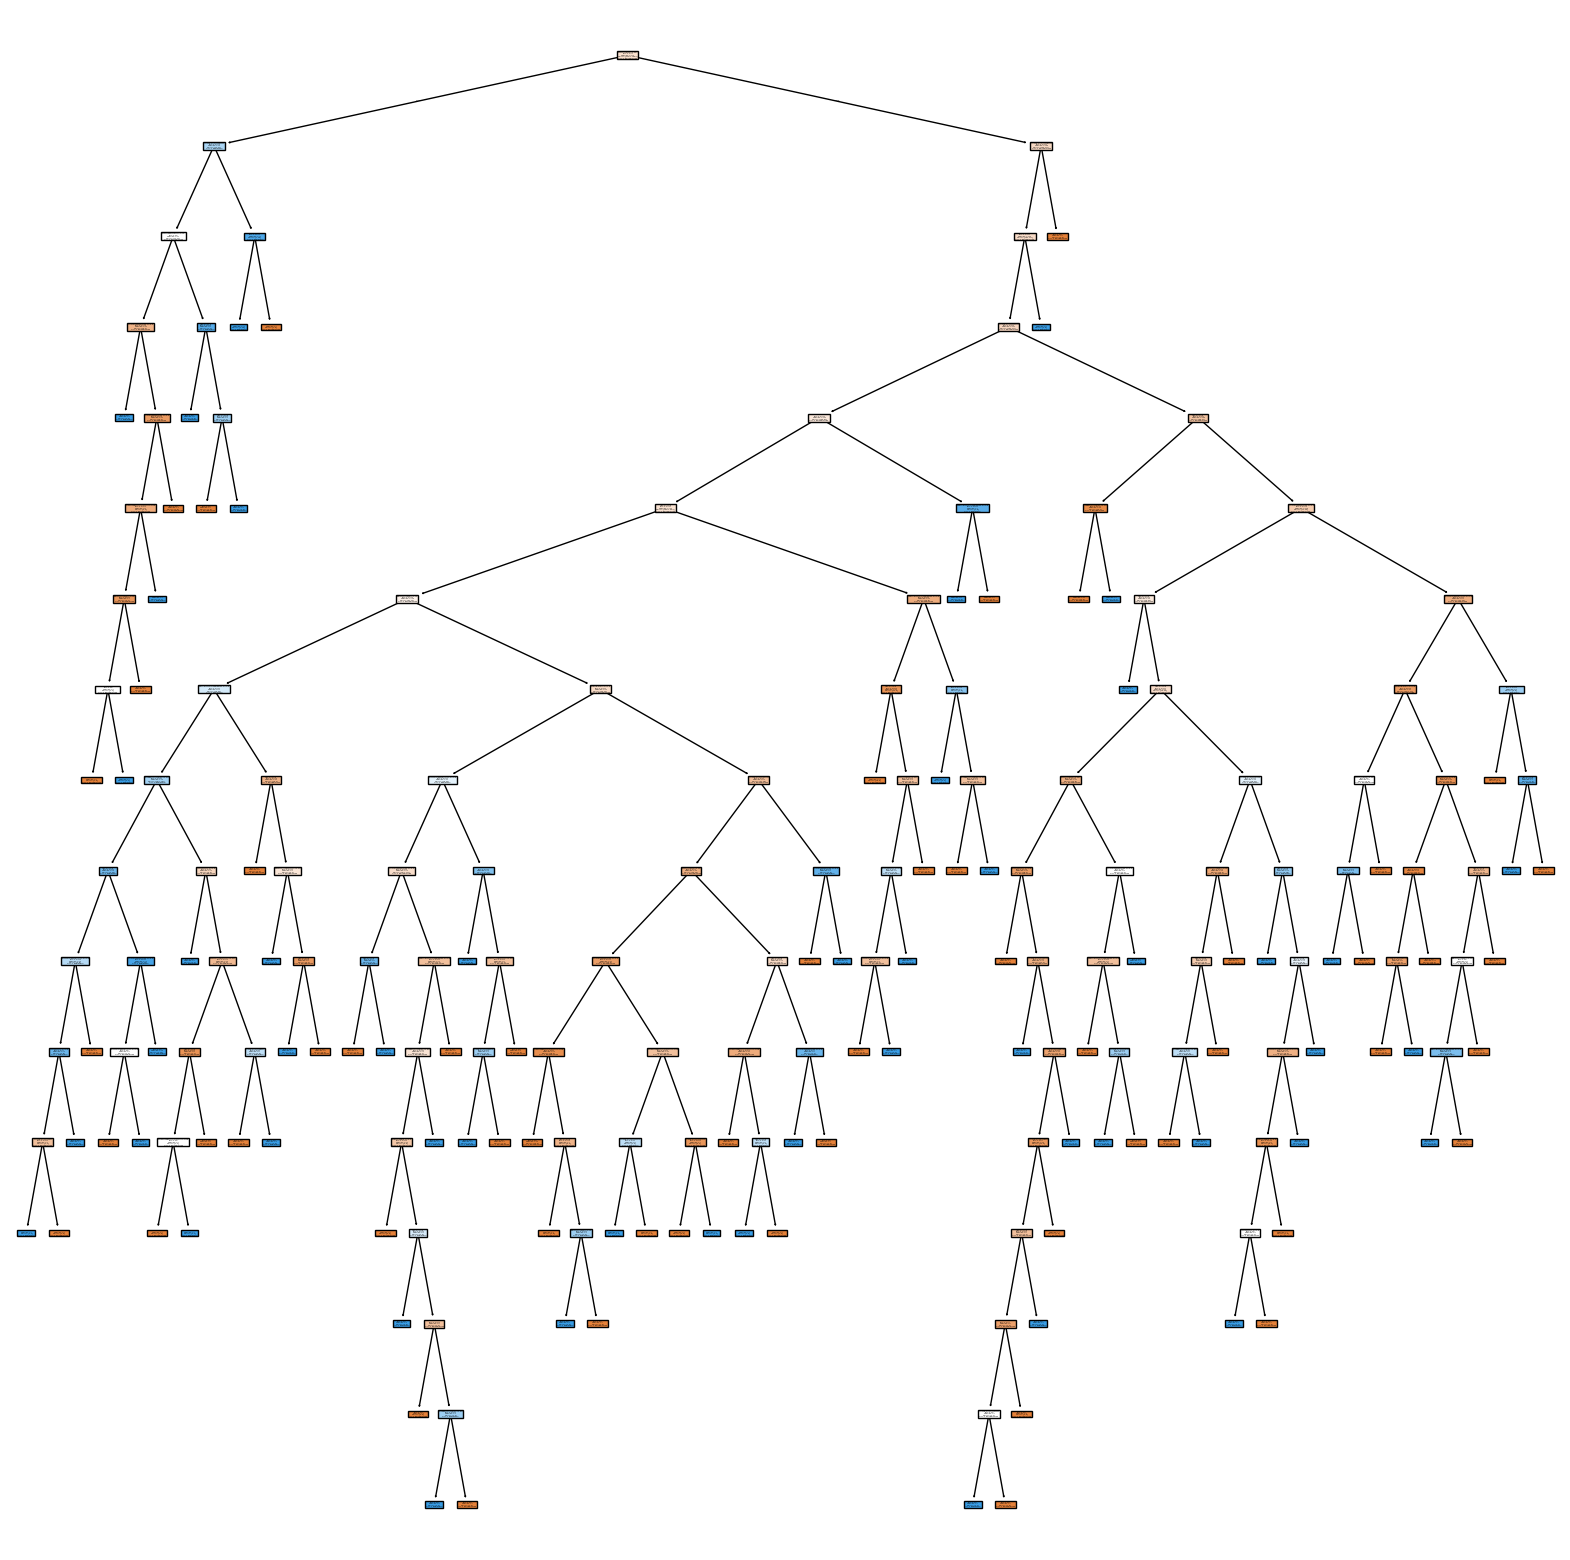

In [496]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['No Depression', 'Depression']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

In [497]:
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Train score 1.0
Test score 0.4435483870967742
Train Confusion matrix


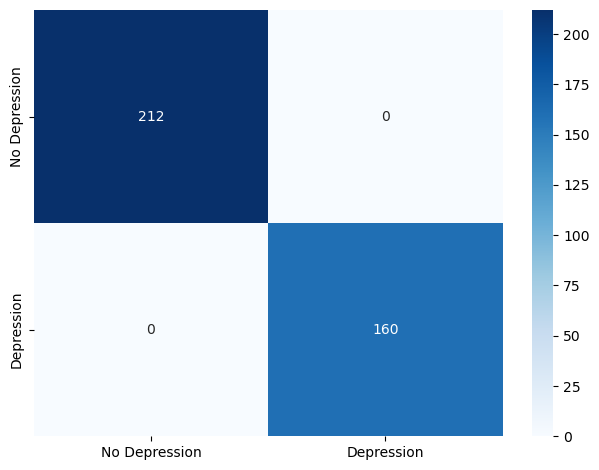

Test Confusion matrix


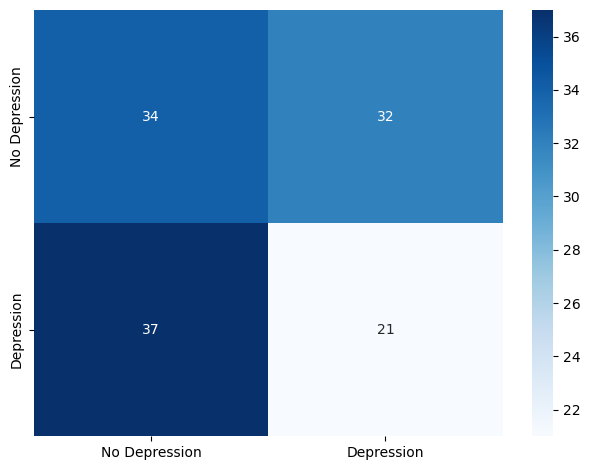

In [498]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

### We can see that in our train data we have 100% accuracy (100 % precison and recall). But in test data model is not well generalizing. We have just 44% accuracy. Over model is clearly overfitting. We will avoid overfitting through pruning. We will do cost complexity prunning.

## Pre pruning techniques

In [501]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

Train score 0.6317204301075269
Test score 0.5161290322580645
Train Confusion matrix


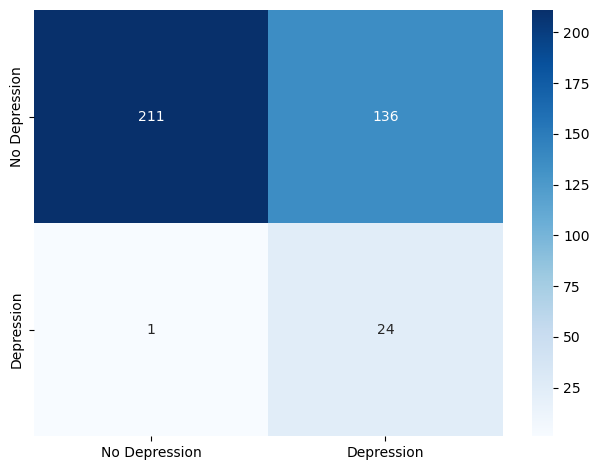

Test Confusion matrix


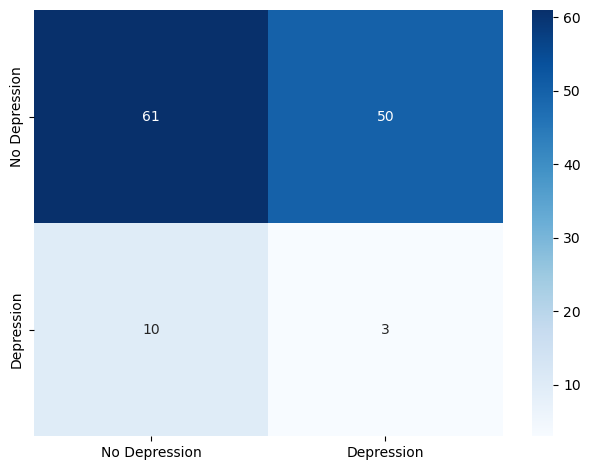

In [502]:
model = gcv.best_estimator_
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

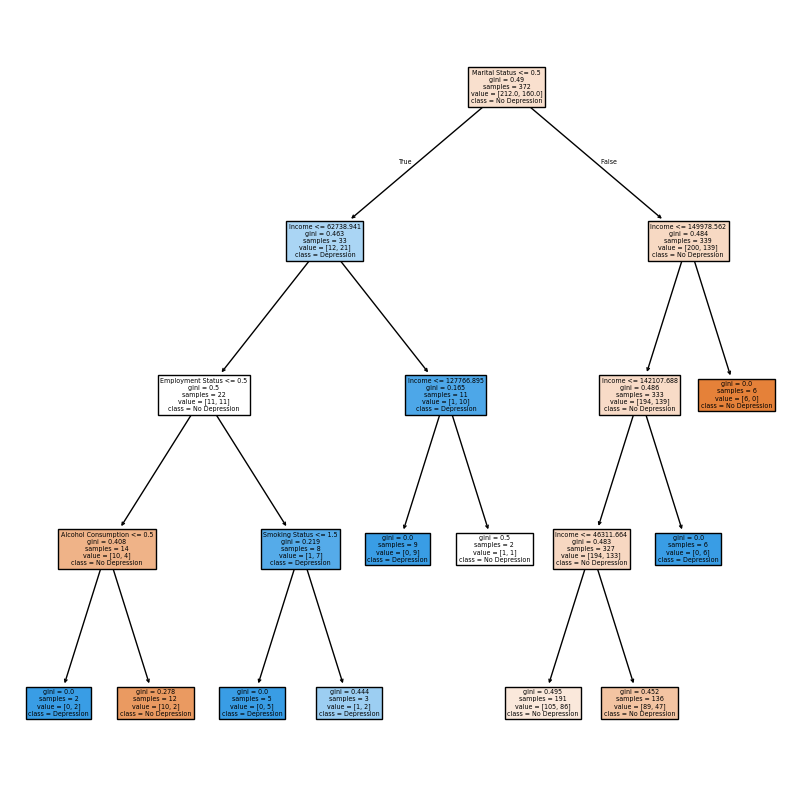

In [503]:
plt.figure(figsize=(10,10))
features = df.columns
classes = ['No Depression','Depression']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

### Tree is pruned and there is improvement in test accuracy (51%). But still there is still scope of improvement.

## Post pruning techniques

In [506]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00215054 0.00224014 0.00235215 0.00235215 0.00238949
 0.00239868 0.00250896 0.00258065 0.00283229 0.00322581 0.00322581
 0.00347158 0.00348648 0.00358423 0.00358423 0.00358423 0.00358423
 0.00383065 0.00403226 0.00409626 0.00409689 0.00413306 0.00413565
 0.00430108 0.00430108 0.00448029 0.00448029 0.00448029 0.00460829
 0.00460829 0.00472843 0.00488351 0.00488759 0.00496278 0.00501792
 0.0052097  0.00544035 0.00586278 0.00614439 0.00640041 0.00676246
 0.00684596 0.00695123 0.00752361 0.00805142 0.00831762]


In [507]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

### We will remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node.

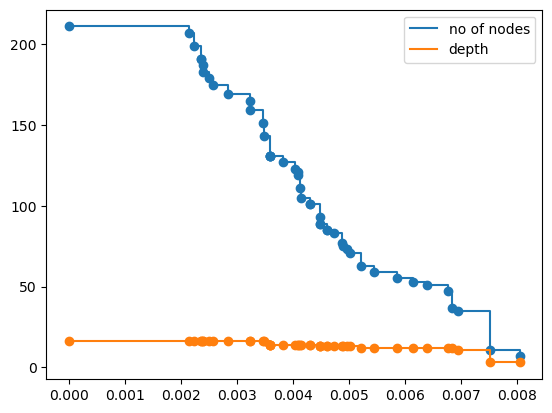

In [509]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

### Observation: As alpha increases no of nodes and depth decreases.

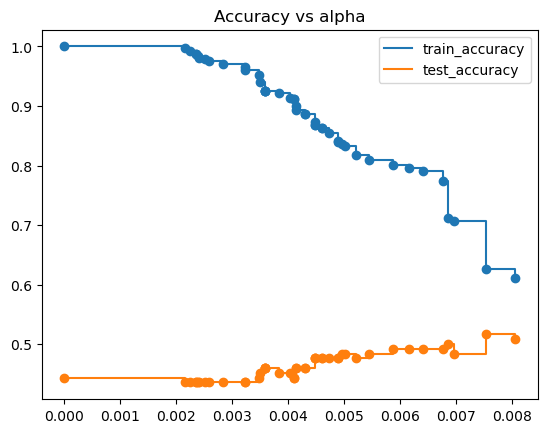

In [511]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(x_train)
    y_test_pred = c.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

Train score 0.6263440860215054
Test score 0.5161290322580645
Train Confusion matrix


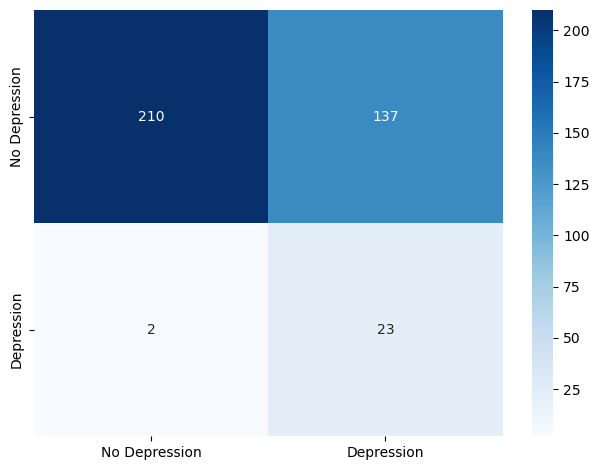

Test Confusion matrix


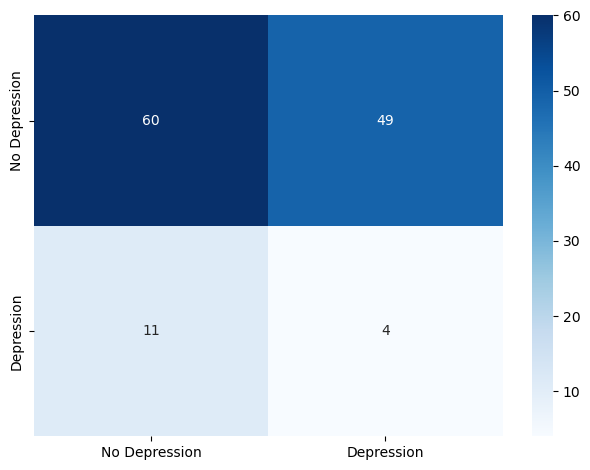

In [580]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.008)
clf_.fit(x_train,y_train)
y_train_pred = clf_.predict(x_train)
y_test_pred = clf_.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

### Model is not overfitting and performance on test data has remained the same (51%)

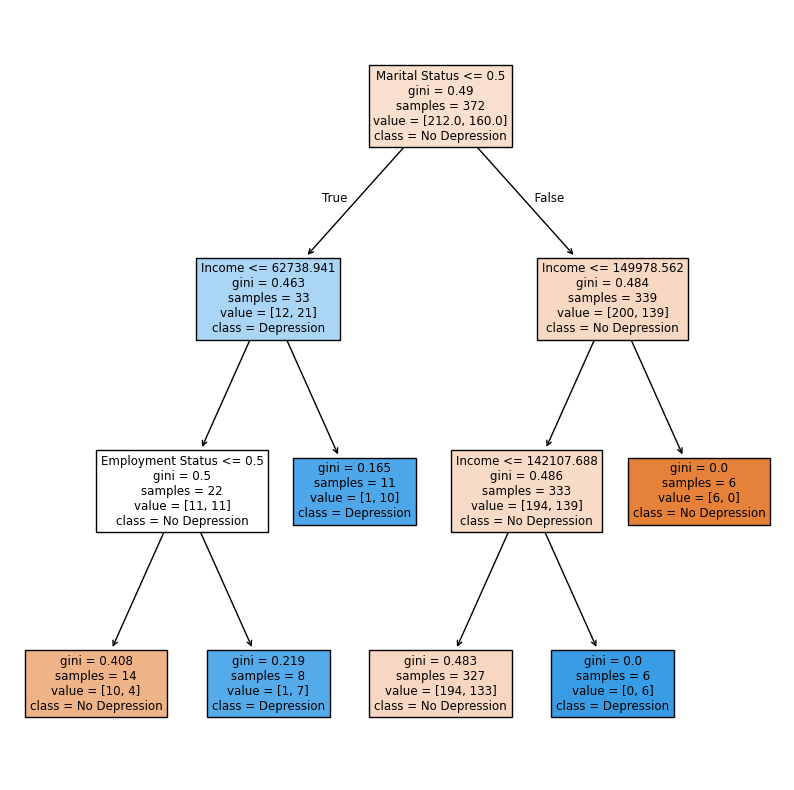

In [583]:
plt.figure(figsize=(10,10))
features = df.columns
classes = ['No Depression','Depression']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()

## We can see that the size of decision tree significantly got reduced. Also postpruning is much efficient than prepruning for this dataset.

## Pre-pruning is more efficient because it avoids unnecessary growth early on. 
### If efficiency is the priority → Use pre-pruning.

## Post-pruning is often more effective in finding the right balance between complexity and performance.
### If accuracy and generalization matter more → Use post-pruning.